# Plot peptide intensities in four eGFR groups
## The peptides were selected from:
* "egfr202 OR
* "all" OR "novel"

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

import seaborn as sns; sns.set()

from set_path import *


In [8]:
egfr20=pd.read_excel(fs+'merged_UPTODATE_v2_with_egfr20_ForHarald_confidence.xlsx',
    index_col=0,
    sheet_name=1)
pep_egfr20=[str(i+99900000) for i in egfr20.index]
#pep_egfr20

['99906213',
 '99919958',
 '99920282',
 '99913595',
 '99906256',
 '99917846',
 '99917833',
 '99911369',
 '99914211']

In [6]:
all=pd.read_excel(fs+'merged_UPTODATE_v2_with_egfr20_ForHarald_confidence.xlsx',
    index_col=0,
    sheet_name=0)
pep_all=[str(i+99900000) for i in all.index[:5]]
pep_all

['99914735', '99904419', '99913825', '99917690', '99917751']

In [9]:
novel=pd.read_excel(fs+'merged_UPTODATE_v2_with_egfr20_ForHarald_confidence.xlsx',
    sheet_name=2,index_col=0)
pep_novel=[str(i+99900000) for i in novel.index]
pep_novel

['99900340',
 '99900579',
 '99901132',
 '99901274',
 '99902293',
 '99902711',
 '99902716',
 '99905899',
 '99906481',
 '99907007',
 '99907890',
 '99908185',
 '99910043',
 '99910392',
 '99910436',
 '99911505',
 '99912032',
 '99912154',
 '99912382',
 '99914519',
 '99902858',
 '99903142',
 '99904813',
 '99906516',
 '99907605',
 '99907622',
 '99908397',
 '99911211',
 '99911504',
 '99917095',
 '99903248']

In [10]:
dfpep=pd.read_csv(f2+'reduced_all_pivot.csv',
    index_col=0,
    usecols=['ProbenID']+pep_egfr20+pep_novel+pep_all)


In [4]:
df=pd.read_csv(f2+'Tianlin_GFR_CKD_EPI_cleaned_20201005.csv',index_col=0,
    usecols=['SampleID','GFR_CKD_EPI','egfr_group'])

In [ ]:
df=df.join(dfpep)

In [12]:
#df=df.replace(0,np.nan)
dict_egfr={0:'>=90',1:'>=60 & <90',
    2:'>=30 & <60',3:'<30'}
df['egfr_group_str']=(df['egfr_group']).map(dict_egfr)

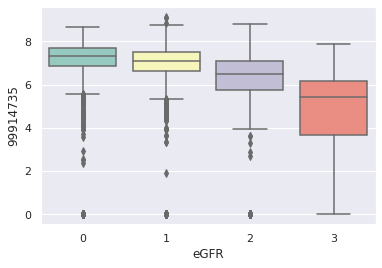

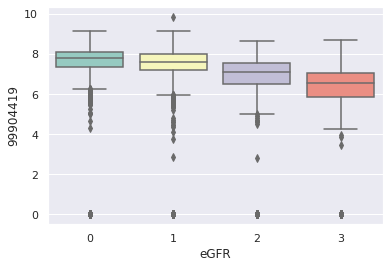

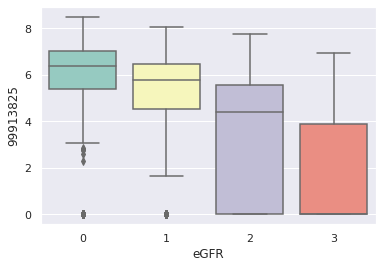

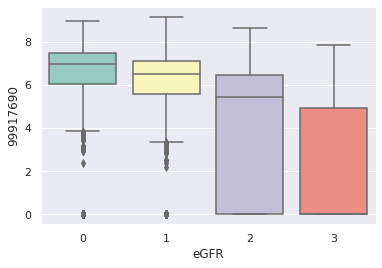

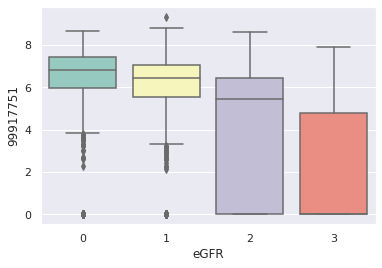

In [14]:
# the distribution of significant peptides of "all" in all egfr groups
for i in pep_all:
    fig, ax=plt.subplots()
    ax=sns.boxplot(x="egfr_group", y=i, data=df,palette="Set3")
    ax.set_xlabel('eGFR')
    #ax.set_xticklabels(dict_egfr.values())
    fig.savefig(f3+i+'_all.tiff')

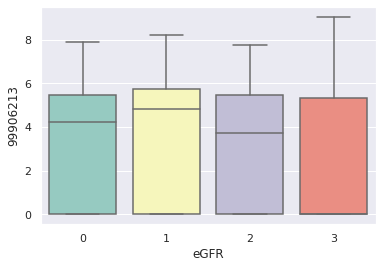

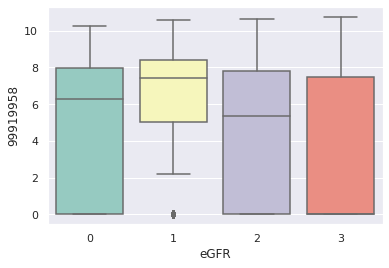

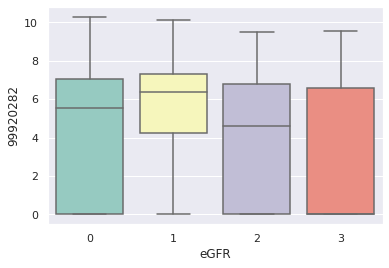

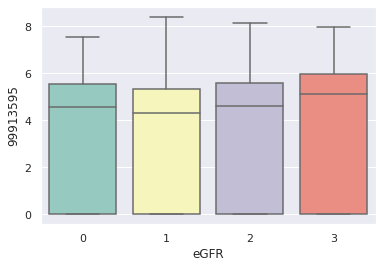

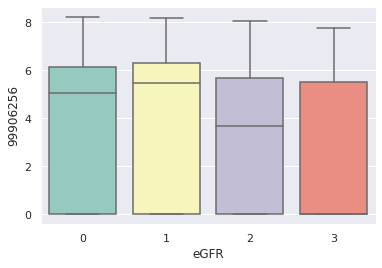

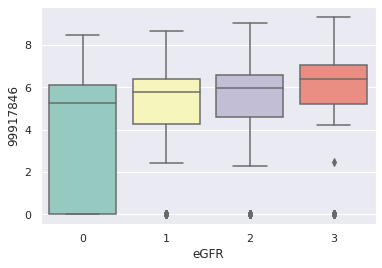

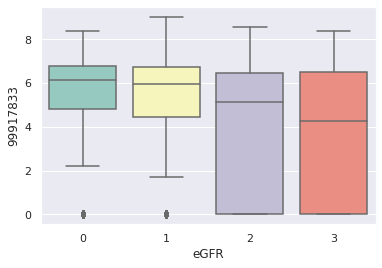

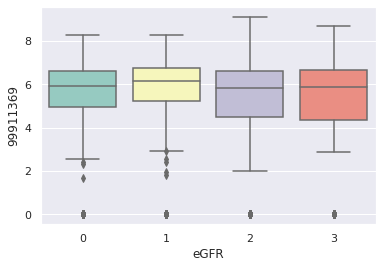

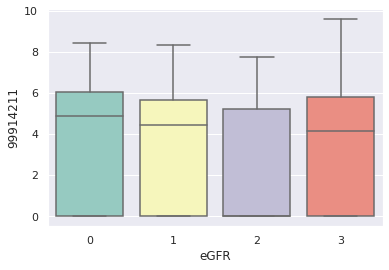

In [85]:

# the distribution of significant peptides of "egfr<20" in all egfr groups
for i in pep_egfr20:
    fig, ax=plt.subplots()
    ax=sns.boxplot(x="egfr_group", y=i, data=df,palette="Set3")
    ax.set_xlabel('eGFR')
    #ax.set_xticklabels(dict_egfr.values())
    fig.savefig(f3+i+'_egfr20.tiff')

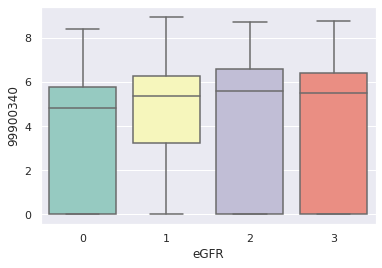

In [84]:
# the distribution of significant peptides of "novel" in all egfr groups
for i in pep_novel:
    fig, ax=plt.subplots()
    ax=sns.boxplot(x="egfr_group", y=i, data=df,palette="Set3")
    ax.set_xlabel('eGFR')
    #ax.set_xticklabels(dict_egfr.values())
    fig.savefig('')
    